In [5]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import jax.numpy as jnp
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm, trange
import seaborn as sns
import scipy.stats as sci_stats

import src.metrics as metrics
import src.kernels as kernels
import src.bootstrap as boot

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


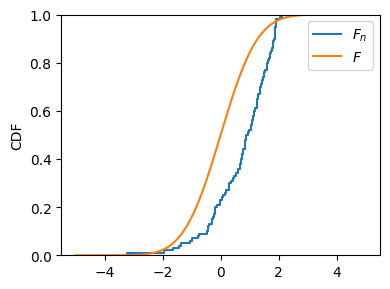

In [167]:
np.random.seed(2024)
xx = np.linspace(-5., 5., 1000)
theo_cdf = sci_stats.norm.cdf(xx)
# x = np.random.chisquare(10, size=100)
x = np.random.gamma(2., 1., size=100)
x = -(x - np.mean(x) - 1.) / np.std(x)

fig, ax = plt.subplots(figsize=(4, 3))

sns.ecdfplot(ax=ax, data=x, label=r"$F_n$")
ax.plot(xx, theo_cdf, label=r"$F$")
ax.set_ylabel("CDF")
ax.legend()

plt.tight_layout()

In [179]:
np.random.seed(2024)

In [183]:
x = np.random.normal(size=100, loc=0., scale=1.5)

In [184]:
ks_res = sci_stats.kstest(x, sci_stats.norm.cdf)
ks_res

KstestResult(statistic=0.1383248839672424, pvalue=0.03939474478629033, statistic_location=1.3305101874185417, statistic_sign=-1)

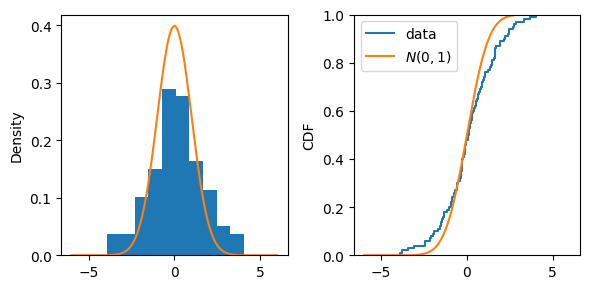

In [185]:
xx = np.linspace(-6., 6., 1000)
theo_pdf = sci_stats.norm.pdf(xx)
theo_cdf = sci_stats.norm.cdf(xx)

figs, axes = plt.subplots(ncols=2, figsize=(6, 3))
ax = axes[0]
_ = ax.hist(x, bins=10, density=True)
ax.plot(xx, theo_pdf)
ax.set_ylabel("Density")

ax = axes[1]
sns.ecdfplot(ax=ax, data=x, label=r"data")
ax.plot(xx, theo_cdf, label=r"$N(0, 1)$")
ax.set_ylabel("CDF")
ax.legend()

plt.tight_layout()

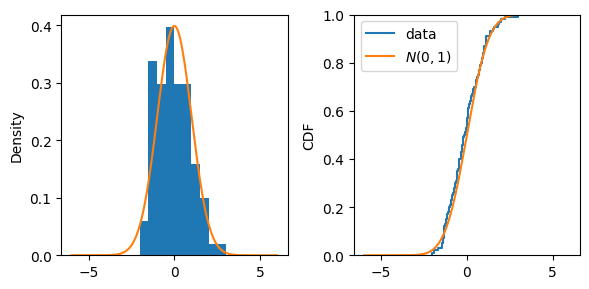

In [187]:
np.random.seed(2024)

df = 20
x = np.random.chisquare(df, size=100)
x = (x - df) / np.sqrt(2 * df)

xx = np.linspace(-6., 6., 1000)
theo_pdf = sci_stats.norm.pdf(xx)
theo_cdf = sci_stats.norm.cdf(xx)

figs, axes = plt.subplots(ncols=2, figsize=(6, 3))
ax = axes[0]
_ = ax.hist(x, bins=10, density=True)
ax.plot(xx, theo_pdf)
ax.set_ylabel("Density")

ax = axes[1]
sns.ecdfplot(ax=ax, data=x, label=r"data")
ax.plot(xx, theo_cdf, label=r"$N(0, 1)$")
ax.set_ylabel("CDF")
ax.legend()

plt.tight_layout()

In [188]:
ks_res = sci_stats.kstest(x, sci_stats.norm.cdf)
ks_res

KstestResult(statistic=0.07989771812207719, pvalue=0.5198570926852468, statistic_location=-0.2272818778797678, statistic_sign=1)

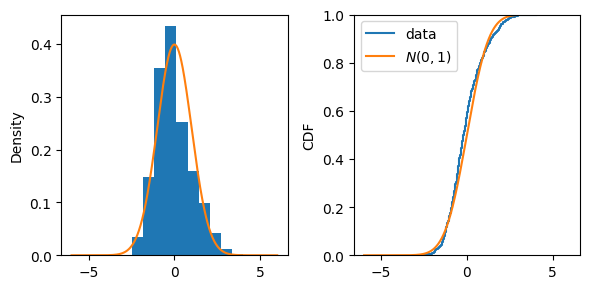

In [189]:
np.random.seed(2024)

df = 20
x = np.random.chisquare(df, size=500)
x = (x - df) / np.sqrt(2 * df)

xx = np.linspace(-6., 6., 1000)
theo_pdf = sci_stats.norm.pdf(xx)
theo_cdf = sci_stats.norm.cdf(xx)

figs, axes = plt.subplots(ncols=2, figsize=(6, 3))
ax = axes[0]
_ = ax.hist(x, bins=10, density=True)
ax.plot(xx, theo_pdf)
ax.set_ylabel("Density")

ax = axes[1]
sns.ecdfplot(ax=ax, data=x, label=r"data")
ax.plot(xx, theo_cdf, label=r"$N(0, 1)$")
ax.set_ylabel("CDF")
ax.legend()

plt.tight_layout()

In [190]:
ks_res = sci_stats.kstest(x, sci_stats.norm.cdf)
ks_res

KstestResult(statistic=0.08885660988255412, pvalue=0.0006946452868654732, statistic_location=-0.0021472042018798334, statistic_sign=1)

In [75]:
x_round = np.round(x, 1)
ks_res_round = sci_stats.kstest(x_round, sci_stats.norm.cdf)
ks_res_round

KstestResult(statistic=0.02514688224992645, pvalue=0.003524964000189459, statistic_location=0.6, statistic_sign=-1)

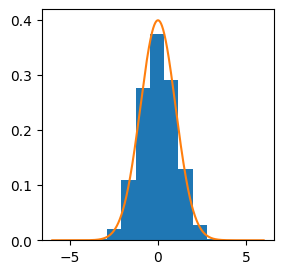

In [76]:
fig, ax = plt.subplots(figsize=(3, 3))
_ = ax.hist(x_round, bins=10, density=True)
ax.plot(xx, yy)